In [1]:
import numpy as np                        
import pandas as pd                       
import matplotlib.pyplot as plt           
import scipy.optimize as scipy_optimize 

Sample plot for temprature distribution. 



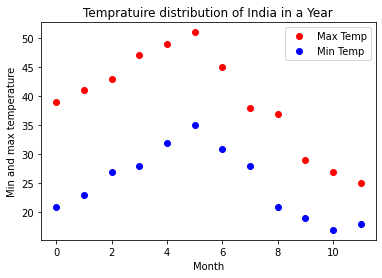

In [2]:

Max=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

# Convert temprature data into input data into numpy array
temp_max=np.array(Max)
temp_min=np.array(Min)

# Get year ( mothly) data
months= np.arange(12) #  month datra for a year

#sample plot

print("Sample plot for temprature distribution. \n")
plt.plot(months,temp_max,'ro',label='Max Temp')
plt.plot(months,temp_min,'bo',label='Min Temp')
plt.title("Tempratuire distribution of India in a Year")
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend()
plt.show()

In [3]:
#fitting it to the periodic function

def yearly_temp_dist(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))




popt_max, pcov_max = scipy_optimize.curve_fit(yearly_temp_dist, months,temp_max, [20, 10, 0])
popt_min, pcov_min = scipy_optimize.curve_fit(yearly_temp_dist, months,temp_min, [-40, 20, 0])



print("Data for Max Temp\n")
print(popt_max, "\n")
print(pcov_max)
print("\nData for Min Temp\n")
print(popt_min,"\n")
print(pcov_min)

Data for Max Temp

[ 39.88861733 -10.59083157   1.33370155] 

[[ 1.28972691 -0.14357414 -0.02263923]
 [-0.14357414  2.57009608 -0.032763  ]
 [-0.02263923 -0.032763    0.07074015]]

Data for Min Temp

[25.55626462 -7.74472964  0.93101294] 

[[ 0.19941393 -0.02644226 -0.00351662]
 [-0.02644226  0.38392581 -0.00606194]
 [-0.00351662 -0.00606194  0.02114122]]


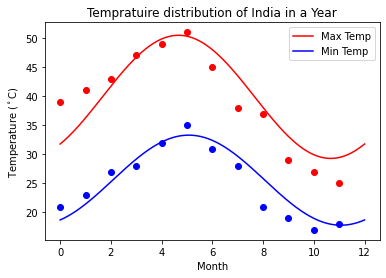

In [5]:
#plot the fit

days = np.linspace(0, 12, num=365)


plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temp_dist(days, *popt_max),'r-', label='Max Temp')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temp_dist(days, *popt_min),'b-', label='Min Temp')
plt.title("Tempratuire distribution of India in a Year")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()


In [6]:
#PROBLEM 2

In [7]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


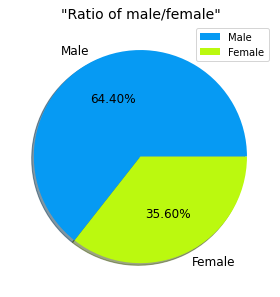

In [8]:
#Create a pie chart presenting the male/female proportion

ratio_male_female= titanic['sex'].value_counts( normalize = True )

labels=['Male','Female']
colors=['xkcd:azure','xkcd:yellowgreen']

patches, text , percentage =plt.pie(ratio_male_female,  labels=labels, colors=colors,autopct='%1.2f%%',shadow=True)

text[0].set_fontsize(12)
percentage[0].set_fontsize(12)
text[1].set_fontsize(12)
percentage[1].set_fontsize(12)

plt.legend(patches, labels, loc=1)
plt.tight_layout()
plt.title('"Ratio of male/female"').set_fontsize(14)
plt.show()

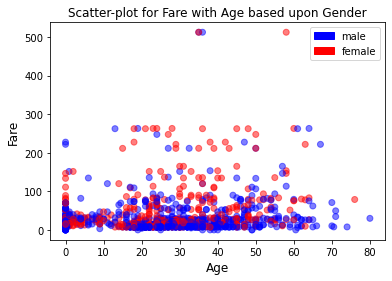

In [10]:
#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

titanic_scatter=titanic[['sex','fare','age']].dropna( how = "all" ) 



import numpy as np
index_fare = titanic_scatter['fare'].index[titanic_scatter['fare'].apply(np.isnan)]
index_age = titanic_scatter['age'].index[titanic_scatter['age'].apply(np.isnan)]
titanic_scatter.iloc[index_age]
titanic_scatter.iloc[index_fare]




titanic_scatter[['fare', 'age']] = titanic_scatter[['fare', 'age']].fillna(value=0)



mapping = {'male' : 'blue', 'female' : 'red'}


import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='blue', label=list(mapping.keys())[0])
blue_patch = mpatches.Patch(color='red', label=list(mapping.keys())[1])


plt.scatter(titanic_scatter['age'],  titanic_scatter['fare'], alpha=0.5, c=titanic_scatter['sex'].map(mapping), label=mapping)

plt.title('Scatter-plot for Fare with Age based upon Gender').set_fontsize(12)
plt.xlabel('Age').set_fontsize(12)
plt.ylabel('Fare').set_fontsize(12)
plt.legend(handles=[red_patch,blue_patch] , loc=0)
plt.show()
